<a href="https://colab.research.google.com/github/abhishekshah5486/classic-machine-learning/blob/main/linear_regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 152MB/s]


In [54]:
df = pd.read_csv("cars24-car-price-cleaned.csv")
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [55]:
df['make'].nunique()

41

In [56]:
df['model'].nunique()

3233

### Target Encoding

In [57]:
df.groupby('make')['selling_price'].transform('mean')

,selling_price
0,4.684721
1,5.458819
2,5.458819
3,4.684721
4,5.858258
...,...
19815,10.532763
19816,4.684721
19817,7.182097
19818,7.315421


In [58]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

### Standard Scaling
#### Method 1 - MinMaxScaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [62]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [63]:
Y = df['selling_price']

In [64]:
X = df.drop('selling_price', axis=1)

In [65]:
Y

,selling_price
0,0.043684
1,0.252397
2,0.089795
3,0.095134
4,0.262104
...,...
19815,0.300934
19816,0.434413
19817,0.191724
19818,0.580027


In [66]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


#### Splitting data into training data and testing data
using train-test-split method from sklearn

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [69]:
X_train.shape, Y_train.shape

((13874, 17), (13874,))

In [70]:
X_test.shape, Y_test.shape

((5946, 17), (5946,))

1 feature -> Univariate Linear Regression ( 2d line )

2 features -> Bivariate Linear Regression ( 3d plane )

d features -> Multivariate Linear Regression ( d + 1 ) dimensional plane

In [71]:
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
model.fit(X1_train, Y_train)

LinearRegression()

In [75]:
model.coef_

array([0.9967642])

In [76]:
model.intercept_

0.0015237505846132926

In [77]:
X1 = X[['model']]
y_hat = model.predict(X1)

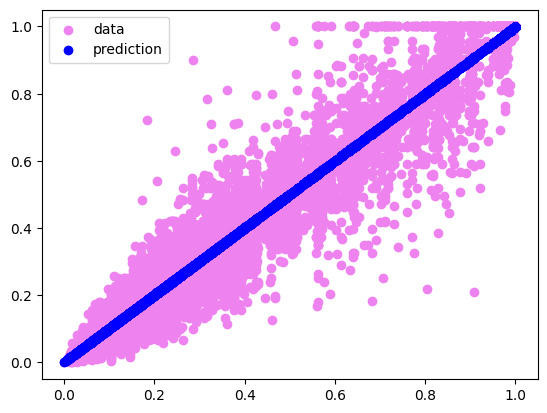

In [78]:
fig = plt.figure()
plt.scatter(X1, Y, color='violet', label='data')
plt.scatter(X1, y_hat, color='blue', label='prediction')
plt.legend()
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [80]:
linear_model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [81]:
linear_model.intercept_

-0.011456351039686896

R^2 Score -> Coefficient of Determination

R^2 = 1 - [ SS_residual / SS_average ]

if R^2 == 0, model working similar to the average model, bad model

if R^2 > 0, model performs better than average model, good model

if R^2 < 0, model performs worse than average model, bad model ( worst model )

In [82]:
linear_model.score(X_train, Y_train)

0.9457591024750988

In [83]:
linear_model.score(X_test, Y_test)

0.9458843076992296

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

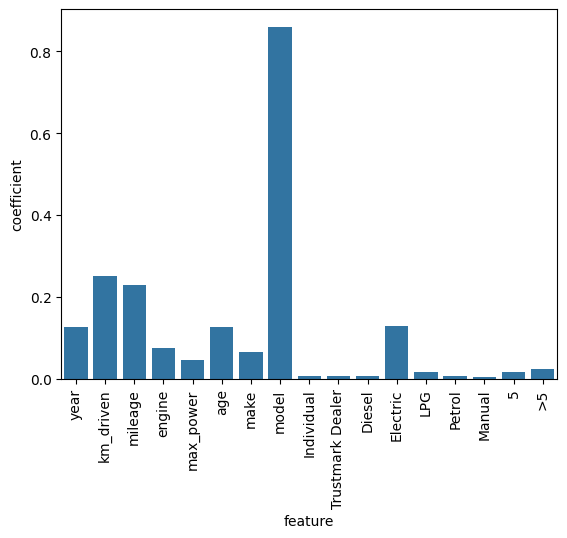

In [94]:
# Mapping the column names with the corresponding coefficients

import seaborn as sns
imp = pd.DataFrame(list(zip(X_test.columns, np.abs(linear_model.coef_))), columns = ['feature', 'coefficient'])
sns.barplot(x = 'feature', y = 'coefficient', data=imp)
plt.xticks(rotation=90)

In [86]:
X_test.columns[np.argmax(abs(linear_model.coef_))]

'model'

In [87]:
X_test.columns[np.argmin(abs(linear_model.coef_))]

'Manual'

In [91]:
import numpy as np
class LinearRegression() :
  def __init__(self, learning_rate, iterations) :
    self.learning_rate = learning_rate
    self.iterations = iterations

In [92]:
def predict(self, X) :
  return np.dot(X, self.W) + self.b;

In [93]:
LinearRegression.predict = predict